In [2]:
import pandas as pd
import soynlp

In [3]:
pd.read_csv('./src/2year_time/현대차_2year.csv')

,Unnamed: 0,날짜,댓글,조회수,좋아요,싫어요
0,0,2022-07-11 22:12,"현대차 :: 가'지'고 ,있으신분만요..",6,0,0
1,1,2022-07-11 21:55,안티들 씨끄럽다. 주식 없으면 꺼져라./...,27,1,1
2,2,2022-07-11 20:32,추가 제시안 안나왔냐,271,1,1
3,3,2022-07-11 20:19,코로나가 다시 창궐할수밖에 없는이유 ~,115,2,3
4,4,2022-07-11 20:18,무제한 공매도,108,5,0
...,...,...,...,...,...,...
182881,182881,2020-06-01 06:22,"현대차 1분기 실적 Review , 기술...",917,0,1
182882,182882,2020-06-01 06:04,오늘상승?,1030,1,2
182883,182883,2020-06-01 01:07,하한가 축하,1325,5,3
182884,182884,2020-06-01 01:03,현기차가 도야타를 뛰어 넘어야,1115,1,1


In [8]:
target = pd.read_csv('./src/2year_time/현대차_2year.csv').drop('Unnamed: 0',axis=1)
target

,날짜,댓글,조회수,좋아요,싫어요
0,2022-07-11 22:12,"현대차 :: 가'지'고 ,있으신분만요..",6,0,0
1,2022-07-11 21:55,안티들 씨끄럽다. 주식 없으면 꺼져라./...,27,1,1
2,2022-07-11 20:32,추가 제시안 안나왔냐,271,1,1
3,2022-07-11 20:19,코로나가 다시 창궐할수밖에 없는이유 ~,115,2,3
4,2022-07-11 20:18,무제한 공매도,108,5,0
...,...,...,...,...,...
182881,2020-06-01 06:22,"현대차 1분기 실적 Review , 기술...",917,0,1
182882,2020-06-01 06:04,오늘상승?,1030,1,2
182883,2020-06-01 01:07,하한가 축하,1325,5,3
182884,2020-06-01 01:03,현기차가 도야타를 뛰어 넘어야,1115,1,1


In [9]:
df = target
df['정제된 댓글'] = df['댓글'].str.replace('\\[삭제된 게시물의 답글\\]',' ')
df['정제된 댓글'] = df['정제된 댓글'].str.replace('답글:',' ')
df['정제된 댓글'] = df['정제된 댓글'].str.replace('[^가-힣]',' ').str.replace(' +',' ').str.strip()
df = df[df['정제된 댓글'] != '']
df = df.reset_index(drop=True)
print('데이터 크기: ',df.shape)

C:\Users\User\AppData\Local\Temp\ipykernel_13084\1993959953.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['정제된 댓글'] = df['댓글'].str.replace('\\[삭제된 게시물의 답글\\]',' ')
C:\Users\User\AppData\Local\Temp\ipykernel_13084\1993959953.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['정제된 댓글'] = df['정제된 댓글'].str.replace('[^가-힣]',' ').str.replace(' +',' ').str.strip()


데이터 크기:  (180665, 6)


In [51]:
df['정제된 댓글 길이'] = [len(str(i)) for i in df['정제된 댓글']]
df = df[df['정제된 댓글 길이'] > 5]

,날짜,댓글,조회수,좋아요,싫어요,정제된 댓글,정제된 댓글 길이
0,2022-07-11 22:12,"현대차 :: 가'지'고 ,있으신분만요..",6,0,0,현대차 가 지 고 있으신분만요,16
1,2022-07-11 21:55,안티들 씨끄럽다. 주식 없으면 꺼져라./...,27,1,1,안티들 씨끄럽다 주식 없으면 꺼져라,19
2,2022-07-11 20:32,추가 제시안 안나왔냐,271,1,1,추가 제시안 안나왔냐,11
3,2022-07-11 20:19,코로나가 다시 창궐할수밖에 없는이유 ~,115,2,3,코로나가 다시 창궐할수밖에 없는이유,19
4,2022-07-11 20:18,무제한 공매도,108,5,0,무제한 공매도,7
...,...,...,...,...,...,...,...
180658,2020-06-01 07:22,미대폭동심상치않다,878,0,2,미대폭동심상치않다,9
180659,2020-06-01 07:05,오늘은..내가간다!!!,880,10,3,오늘은 내가간다,8
180660,2020-06-01 06:22,"현대차 1분기 실적 Review , 기술...",917,0,1,현대차 분기 실적 기술,12
180662,2020-06-01 01:07,하한가 축하,1325,5,3,하한가 축하,6


In [53]:
df = df.reset_index()
df = df.drop('index',axis=1)
df

,날짜,댓글,조회수,좋아요,싫어요,정제된 댓글,정제된 댓글 길이
0,2022-07-11 22:12,"현대차 :: 가'지'고 ,있으신분만요..",6,0,0,현대차 가 지 고 있으신분만요,16
1,2022-07-11 21:55,안티들 씨끄럽다. 주식 없으면 꺼져라./...,27,1,1,안티들 씨끄럽다 주식 없으면 꺼져라,19
2,2022-07-11 20:32,추가 제시안 안나왔냐,271,1,1,추가 제시안 안나왔냐,11
3,2022-07-11 20:19,코로나가 다시 창궐할수밖에 없는이유 ~,115,2,3,코로나가 다시 창궐할수밖에 없는이유,19
4,2022-07-11 20:18,무제한 공매도,108,5,0,무제한 공매도,7
...,...,...,...,...,...,...,...
144117,2020-06-01 07:22,미대폭동심상치않다,878,0,2,미대폭동심상치않다,9
144118,2020-06-01 07:05,오늘은..내가간다!!!,880,10,3,오늘은 내가간다,8
144119,2020-06-01 06:22,"현대차 1분기 실적 Review , 기술...",917,0,1,현대차 분기 실적 기술,12
144120,2020-06-01 01:07,하한가 축하,1325,5,3,하한가 축하,6


In [59]:
tp = [str(i) for i in list(df['정제된 댓글'])]
save = '\n'.join(tp)

In [61]:
f = open("./corpus_target.txt", 'a',encoding='utf8')
f.write(save)
f.close()

In [43]:
from soynlp.noun import LRNounExtractor_v2
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor
corpus = DoublespaceLineCorpus("./corpus_target.txt",iter_sent=True)
noun_extractor = LRNounExtractor_v2(verbose=True)

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107


In [44]:
nouns = noun_extractor.train_extract(corpus)

[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 131682 from 180665 sents. mem=0.390 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=542349, mem=0.644 Gb
[Noun Extractor] batch prediction was completed for 30742 words
[Noun Extractor] checked compounds. discovered 15561 compounds
[Noun Extractor] postprocessing detaching_features : 21290 -> 17888
[Noun Extractor] postprocessing ignore_features : 17888 -> 17738
[Noun Extractor] postprocessing ignore_NJ : 17738 -> 17579
[Noun Extractor] 17579 nouns (15561 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.692 Gb                    
[Noun Extractor] 65.23 % eojeols are covered


{'한화에어로스페이스': NounScore(frequency=4, score=1.0),
 '가즈아아아아아아': NounScore(frequency=2, score=1.0),
 '보스턴다이나믹스': NounScore(frequency=21, score=1.0),
 '다우육상운송지수': NounScore(frequency=7, score=1.0),
 '보스턴다이내믹스': NounScore(frequency=19, score=1.0),
 '셀트리온헬스케어': NounScore(frequency=4, score=1.0),
 '보스톤다이나믹스': NounScore(frequency=6, score=1.0),
 '러시아디폴트선언': NounScore(frequency=1, score=0.5),
 '떨어진드아아아': NounScore(frequency=2, score=1.0),
 '오리엔트바이오': NounScore(frequency=2, score=1.0),
 '보유중이신분들': NounScore(frequency=16, score=1.0),
 '현대차그룹주들': NounScore(frequency=4, score=1.0),
 '청와대국민청원': NounScore(frequency=5, score=1.0),
 '현대차주주님들': NounScore(frequency=7, score=1.0),
 '계룡도사정도령': NounScore(frequency=2, score=1.0),
 '현대자동차그룹': NounScore(frequency=12, score=0.3333333333333333),
 '비지에프리테일': NounScore(frequency=2, score=1.0),
 '엘지디스플레이': NounScore(frequency=5, score=1.0),
 '악질이대올로기': NounScore(frequency=2, score=1.0),
 '중고차사업진출': NounScore(frequency=2, score=1.0),
 '정씨좃잡고반성': NounScore(frequency=

In [45]:
scores = {word:score.score for word, score in nouns.items()}
scores

{'한화에어로스페이스': 1.0,
 '가즈아아아아아아': 1.0,
 '보스턴다이나믹스': 1.0,
 '다우육상운송지수': 1.0,
 '보스턴다이내믹스': 1.0,
 '셀트리온헬스케어': 1.0,
 '보스톤다이나믹스': 1.0,
 '러시아디폴트선언': 0.5,
 '떨어진드아아아': 1.0,
 '오리엔트바이오': 1.0,
 '보유중이신분들': 1.0,
 '현대차그룹주들': 1.0,
 '청와대국민청원': 1.0,
 '현대차주주님들': 1.0,
 '계룡도사정도령': 1.0,
 '현대자동차그룹': 0.3333333333333333,
 '비지에프리테일': 1.0,
 '엘지디스플레이': 1.0,
 '악질이대올로기': 1.0,
 '중고차사업진출': 1.0,
 '정씨좃잡고반성': 0.5,
 '현대중공업지주': 1.0,
 '미국전기차공장': 0.8,
 '인문학사회분야': 1.0,
 '선물옵션만기일': 1.0,
 '마이크로소프트': 1.0,
 '바이오사이언스': 1.0,
 '삼전동학개미들': 1.0,
 '가로세로연구소': 1.0,
 '첫끗발이개끗발': 1.0,
 '청와대청원부탁': 1.0,
 '보스턴다이나믹': 1.0,
 '홍남기해임청원': 0.6,
 '하하하하하하하': 0.5714285714285714,
 '삼성에스디아이': 1.0,
 '그것이알고싶다': 1.0,
 '시장조성자제도': 1.0,
 '가두리양식장': 1.0,
 '사고싶어안달': 1.0,
 '자사주소각이': 0.5,
 '현대글로비스': 1.0,
 '자사주매입안': 1.0,
 '실적발표언제': 1.0,
 '자가주식취득': 0.75,
 '공포에사라고': 1.0,
 '만원까지폭락': 1.0,
 '우리나라기업': 1.0,
 '자동차관련주': 0.3333333333333333,
 '멍청한개미들': 1.0,
 '현대오토에버': 1.0,
 '영끌추격매수': 1.0,
 '계룡산정도령': 1.0,
 '한국주식시장': 1.0,
 '자율주행기술': 1.0,
 '동학개미운동': 1.0,
 '하락추세시작': 1.0,
 '자동차회사들': 1

In [46]:
from soynlp.tokenizer import LTokenizer
tokenizer = LTokenizer(scores=scores)

In [47]:
for i in range(100):
    print(target['정제된 댓글'][i]+'  ',end='')
    print(tokenizer.tokenize(target['정제된 댓글'][i]))

현대차 가 지 고 있으신분만요  ['현대차', '가', '지', '고', '있으신분만요']
안티들 씨끄럽다 주식 없으면 꺼져라  ['안티들', '씨끄럽다', '주식', '없으면', '꺼져라']
추가 제시안 안나왔냐  ['추가', '제시', '안', '안나왔냐']
코로나가 다시 창궐할수밖에 없는이유  ['코로', '나가', '다시', '창궐', '할수밖에', '없는이유']
무제한 공매도  ['무제한', '공매', '도']
불법점거 불법행위에도 공권력은 뒷짐만  ['불법점거', '불법행위', '에도', '공권력은', '뒷짐만']
악재뿐  ['악재뿐']
월말 만원 나만 보이냐  ['월말', '만원', '나만', '보이냐']
실적 조  ['실적', '조']
이제 슬슬 상승기운이  ['이제', '슬슬', '상승기운', '이']
정부가 이제 리콜 명령때리고  ['정부', '가', '이제', '리콜', '명령', '때리고']
대여체결 겁나되네  ['대여체결', '겁나되네']
신고 계속 속출  ['신고', '계속', '속출']
니들 내일 뒤졌네  ['니들', '내일', '뒤졌네']
아이오닉  ['아이오닉']
현대차그룹 사우디 탈석유화 최대 수혜 받  ['현대차', '그룹', '사우디', '탈석유화', '최대', '수혜', '받']
배당금 원 주세요  ['배당금', '원', '주세요']
삼성 현대 빌게이츠와 차세대 원전 투자  ['삼성', '현대', '빌게이츠', '와', '차세대', '원전', '투자']
현대차빼고는  ['현대차', '빼고는']
빨리 내일먹을  ['빨리', '내일', '먹을']
재벌 다주택 부동산부자 감세할때는  ['재벌', '다주택', '부동산부자', '감세할때는']
아베 전 수상 총격 암살에 대해서  ['아베', '전', '수상', '총격', '암살', '에', '대해서']
개잡주 남바  ['개잡주', '남바']
공매도 금지 상황 따라 활용 뉴스  ['공매', '도', '금지', '상황', '따라', '활용', '뉴스']
예측  ['예측']
정말 대단하십

In [65]:
ktop30_company = pd.read_excel('./KODEX_KTOP_30_20220629.xlsx',header=2).drop(0,axis=0)['종목명']
print(list(ktop30_company))

['삼성전자', 'NAVER', '삼성SDI', 'LG화학', '카카오', '유한양행', 'SK텔레콤', 'POSCO홀딩스', '현대모비스', 'SK이노베이션', '삼성화재', '롯데케미칼', '현대차', '셀트리온', '삼성전기', '아모레퍼시픽', '삼성물산', '이마트', 'CJ ENM', 'SK하이닉스', '한국조선해양', 'LG전자', '기아', '넷마블', '삼성생명', 'KB금융', '현대건설', '신한지주', 'LG디스플레이', '미래에셋증권']


In [62]:
def corpus_save(company):
    target = pd.read_csv(f'./src/2year_time/{company}_2year.csv').drop('Unnamed: 0',axis=1)
    df = target
    df['정제된 댓글'] = df['댓글'].str.replace('\\[삭제된 게시물의 답글\\]',' ')
    df['정제된 댓글'] = df['정제된 댓글'].str.replace('답글:',' ')
    df['정제된 댓글'] = df['정제된 댓글'].str.replace('[^가-힣]',' ').str.replace(' +',' ').str.strip()
    df = df[df['정제된 댓글'] != '']
    df = df.reset_index(drop=True)
    df['정제된 댓글 길이'] = [len(str(i)) for i in df['정제된 댓글']]
    df = df[df['정제된 댓글 길이'] > 5]
    
    tp = [str(i) for i in list(df['정제된 댓글'])]
    save = '\n'.join(tp)
    f = open("./corpus_target.txt", 'a',encoding='utf8')
    f.write(save)
    f.close()

In [71]:
def corpus_init():
    company_set = list(ktop30_company)
    company_set.append('sampro')
    f = open("./corpus_target.txt", 'w',encoding='utf8')
    f.write(save)
    f.close()
    for company in company_set:
        corpus_save(company)

C:\Users\User\AppData\Local\Temp\ipykernel_13084\3318960043.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['정제된 댓글'] = df['댓글'].str.replace('\\[삭제된 게시물의 답글\\]',' ')
C:\Users\User\AppData\Local\Temp\ipykernel_13084\3318960043.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['정제된 댓글'] = df['정제된 댓글'].str.replace('[^가-힣]',' ').str.replace(' +',' ').str.strip()
C:\Users\User\AppData\Local\Temp\ipykernel_13084\3318960043.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['정제된 댓글'] = df['댓글'].str.replace('\\[삭제된 게시물의 답글\\]',' ')
C:\Users\User\AppData\Local\Temp\ipykernel_13084\3318960043.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['정제된 댓글'] = df['정제된 댓글'].str.replace('[^가-힣]',' ').str.replace(' +',' ').str.strip()
C:\Users\User\AppData\Local\Temp\ipykernel_13084\33189

FileNotFoundError: [Errno 2] No such file or directory: './src/2year_time/POSCO홀딩스_2year.csv'

In [72]:
from soynlp.noun import LRNounExtractor_v2
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor
from soynlp.tokenizer import LTokenizer


[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107


In [73]:
def return_tokenizer():
    corpus = DoublespaceLineCorpus("./corpus_target.txt",iter_sent=True)
    noun_extractor = LRNounExtractor_v2(verbose=True)
    nouns = noun_extractor.train_extract(corpus)
    scores = {word:score.score for word, score in nouns.items()}
    tokenizer = LTokenizer(scores=scores)
    return tokenizer

In [69]:
for i in range(100):
    print(target['정제된 댓글'][i]+'  ',end='')
    print(tokenizer.tokenize(target['정제된 댓글'][i]))

현대차 가 지 고 있으신분만요  ['현대차', '가', '지', '고', '있으신분만요']
안티들 씨끄럽다 주식 없으면 꺼져라  ['안티들', '씨끄럽다', '주식', '없으면', '꺼져라']
추가 제시안 안나왔냐  ['추가', '제시', '안', '안나왔냐']
코로나가 다시 창궐할수밖에 없는이유  ['코로나', '가', '다시', '창궐', '할수밖에', '없는이유']
무제한 공매도  ['무제한', '공매도']
불법점거 불법행위에도 공권력은 뒷짐만  ['불법점거', '불법', '행위에도', '공권력', '은', '뒷짐', '만']
악재뿐  ['악재', '뿐']
월말 만원 나만 보이냐  ['월말', '만원', '나만', '보이냐']
실적 조  ['실적', '조']
이제 슬슬 상승기운이  ['이제', '슬슬', '상승', '기운이']
정부가 이제 리콜 명령때리고  ['정부', '가', '이제', '리콜', '명령', '때리고']
대여체결 겁나되네  ['대여체결', '겁나되네']
신고 계속 속출  ['신고', '계속', '속출']
니들 내일 뒤졌네  ['니들', '내일', '뒤졌네']
아이오닉  ['아이오닉']
현대차그룹 사우디 탈석유화 최대 수혜 받  ['현대차', '그룹', '사우디', '탈석유화', '최대', '수혜', '받']
배당금 원 주세요  ['배당금', '원', '주세요']
삼성 현대 빌게이츠와 차세대 원전 투자  ['삼성', '현대', '빌게이츠', '와', '차세대', '원전', '투자']
현대차빼고는  ['현대차', '빼고는']
빨리 내일먹을  ['빨리', '내일', '먹을']
재벌 다주택 부동산부자 감세할때는  ['재벌', '다주택', '부동산부자', '감세', '할때는']
아베 전 수상 총격 암살에 대해서  ['아베', '전', '수상', '총격', '암살', '에', '대해서']
개잡주 남바  ['개잡주', '남바']
공매도 금지 상황 따라 활용 뉴스  ['공매도', '금지', '상황', '따라', '활용', '뉴스']
예측  ['예측']

In [1]:
import pandas as pd

In [4]:
company = list(pd.read_excel('./KODEX_KTOP_30_20220715.xls',header=2)['종목명'][1:])
company[15:]

['삼성전기',
 '삼성물산',
 '이마트',
 'CJ ENM',
 'SK하이닉스',
 'LG전자',
 '한국조선해양',
 '기아',
 '넷마블',
 '삼성생명',
 'KB금융',
 '현대건설',
 '신한지주',
 'LG디스플레이',
 '미래에셋증권']

In [5]:
import pandas as pd
import soynlp
from soynlp.noun import LRNounExtractor_v2
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor
from soynlp.tokenizer import LTokenizer

import warnings
warnings.filterwarnings('ignore')

In [6]:
def clean_sents_df(company):
    try:
        target = pd.read_csv(f'./src/2year_time/{company}_2year.csv',encoding='utf8').drop('Unnamed: 0',axis=1)
    except:
        target = pd.read_csv(f'./src/2year_time/{company}_2year.csv',encoding='utf8')

    if company == 'sampro':
        target.rename(columns={'comment':'댓글'},inplace=True)
    df = target
    df['정제된 댓글'] = df['댓글'].str.replace('\\[삭제된 게시물의 답글\\]',' ')
    df['정제된 댓글'] = df['정제된 댓글'].str.replace('답글:',' ')
    df['정제된 댓글'] = df['정제된 댓글'].str.replace('[^가-힣]',' ').str.replace(' +',' ').str.strip()
    df = df[df['정제된 댓글'] != '']
    df = df.reset_index(drop=True)
    return  df

def corpus_save(company):
    df = clean_sents_df(company)
    df['정제된 댓글 길이'] = [len(str(i)) for i in df['정제된 댓글']]
    df = df[df['정제된 댓글 길이'] > 5]

    tp = [str(i) for i in list(df['정제된 댓글'])]
    save = '\n'.join(tp)
    f = open("./corpus_target.txt", 'a',encoding='utf8')
    f.write(save)
    f.close()

    
def corpus_init():
    ktop30_company = pd.read_excel('./KODEX_KTOP_30_20220629.xlsx',header=2).drop(0,axis=0)['종목명']
    company_set = list(ktop30_company)
    company_set.append('sampro')
    f = open("./corpus_target.txt", 'w',encoding='utf8')
    f.write('')
    f.close()
    for company in company_set:
        corpus_save(company)

def return_tokenizer():
    corpus = DoublespaceLineCorpus("./corpus_target.txt",iter_sent=True)
    noun_extractor = LRNounExtractor_v2(verbose=True)
    nouns = noun_extractor.train_extract(corpus)
    scores = {word:score.score for word, score in nouns.items()}
    tokenizer = LTokenizer(scores=scores)
    return tokenizer

In [7]:
tokenizer = return_tokenizer()

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 1871784 from 3181878 sents. mem=0.383 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=16231322, mem=4.353 Gb
[Noun Extractor] batch prediction was completed for 460510 words
[Noun Extractor] checked compounds. discovered 464165 compounds
[Noun Extractor] postprocessing detaching_features : 411493 -> 313632
[Noun Extractor] postprocessing ignore_features : 313632 -> 313101
[Noun Extractor] postprocessing ignore_NJ : 313101 -> 307570
[Noun Extractor] 307570 nouns (464165 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=4.945 Gb                    
[Noun Extractor] 73.32 % eojeols are covered


In [8]:
token = []
for i in range(15,30):
    target_df = clean_sents_df(company[i])
    target_df['토큰화 댓글'] = [tokenizer(str(i)) for i in target_df['정제된 댓글']]
    token.extend(list(target_df['토큰화 댓글']))

In [15]:
tp = []
for i in token:
    tp.extend(i)
tp = pd.DataFrame(tp).value_counts()

In [30]:
words = pd.DataFrame([[tp.index[i][0],tp[i]] for i in range(len(tp))],columns=['words','count'])

In [32]:
words['length'] = [len(i) for i in words['words']]

In [45]:
words[words['length'] > 1][550:600]

,words,count,length
680,멸공,651,2
681,라도,650,2
682,이지,650,2
683,저주,647,2
684,알고,647,2
686,미증시,643,3
687,사는,642,2
688,현건,641,2
690,넘들,641,2
691,원래,641,2


In [ ]:
# fear: 매도,개잡,하락,폭락,추매,반등,바닥,존버,떡락,줍줍,개잡주전문가,금리인상,급락,대폭락

# greed: 매수,상승,호재,가즈아,간다,가자,상한가,폭등,대박,익절

In [10]:
from pykrx import stock
import pandas as pd
pd.DataFrame(stock.get_index_ohlcv_by_date('2022-06-01','2022-06-30','1001')).reset_index()

코스피,날짜,시가,고가,저가,종가,거래량,거래대금,상장시가총액
0,2022-06-02,2670.74,2674.00,2653.59,2658.99,525259148,7860485371460,2092789270563649
1,2022-06-03,2679.57,2681.51,2663.00,2670.65,562469813,7566757988438,2101703361724826
2,2022-06-07,2659.27,2662.04,2622.78,2626.34,524710380,8948923639761,2067165430942135
3,2022-06-08,2633.53,2639.52,2621.96,2626.15,576389702,7964335124403,2066742737105469
4,2022-06-09,2618.92,2627.88,2606.61,2625.44,814882844,10857975089630,2066451297057888
5,2022-06-10,2596.37,2602.80,2583.74,2595.87,724089803,8285964062392,2043213222024130
6,2022-06-13,2550.21,2550.32,2504.51,2504.51,660309279,10335873891430,1972203677735303
7,2022-06-14,2472.96,2503.17,2457.39,2492.97,671756827,9992819780261,1962993357171067
8,2022-06-15,2490.01,2495.54,2436.04,2447.38,714143493,9936928113647,1926857817400711
9,2022-06-16,2481.66,2500.36,2447.33,2451.41,584041265,9588186586438,1931070977616452


In [26]:
temp1 = pd.DataFrame(stock.get_index_ohlcv_by_date('2022-06-01','2022-06-30','1001')).reset_index().loc[:,['날짜','시가']]
temp1.info()
temp1['날짜'] = [str(i).split()[0] for i in temp1['날짜']]
temp1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      20 non-null     datetime64[ns]
 1   시가      20 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 448.0 bytes


코스피,날짜,시가
0,2022-06-02,2670.74
1,2022-06-03,2679.57
2,2022-06-07,2659.27
3,2022-06-08,2633.53
4,2022-06-09,2618.92
5,2022-06-10,2596.37
6,2022-06-13,2550.21
7,2022-06-14,2472.96
8,2022-06-15,2490.01
9,2022-06-16,2481.66


In [20]:
temp2 = pd.read_csv('./2022-06_score.csv')
temp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      30 non-null     object 
 1   score   30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 608.0+ bytes


In [28]:
tp = temp2.merge(temp1,how='outer',on='날짜')

In [30]:
tp = tp.fillna(temp1['시가'].mean())

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


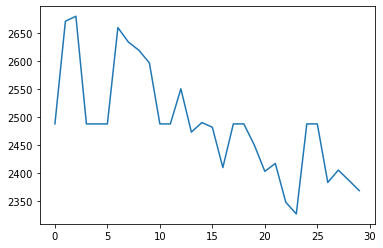

In [31]:
tp['시가'].plot()

<AxesSubplot:>

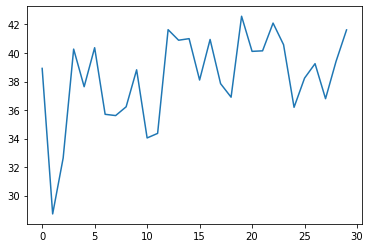

In [32]:
tp['score'].plot()